## Implementation of stochastic and batch gradient descent in python

We will use very simple home prices data set to implement batch and stochastic gradient descent in python. Batch gradient descent uses all training samples in forward pass to calculate cumulitive error and than we adjust weights using derivaties. In stochastic GD, we randomly pick one training sample, perform forward pass, compute the error and immidiately adjust weights. So the key difference here is that to adjust weights batch GD will use all training samples where as stochastic GD will use one randomly picked training sample

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
8,1310,3,50.0
2,1440,3,62.0
10,1800,3,82.0
7,3300,4,155.0
1,2600,4,120.0


#### Preprocessing/Scaling the data

In [3]:
from sklearn import preprocessing
sx=preprocessing.MinMaxScaler()
sy=preprocessing.MinMaxScaler()

scaled_X=sx.fit_transform(df.drop('price',axis='columns'))
scaled_y=sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [4]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

We should convert target column(price) into 1D array, its 2D due to scaling

In [5]:
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [6]:
def batch_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    number_of_features=X.shape[1]
    w=np.ones(shape=(number_of_features))
    b=0
    total_samples=X.shape[0]
    cost_list=[]
    epoch_list=[]

    for i in range(epochs):
        # w1*area + w2* bedroom+bedroom
        y_predicted= np.dot(w,X.T) + b  #take dot prod of w, and X transpose

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)

        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad

        cost=np.mean(np.square(y_true-y_predicted))  #MEAN SQUARED ERROR

        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list
w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]),
 np.float64(-0.23034857438407427),
 np.float64(0.0068641890429808105))

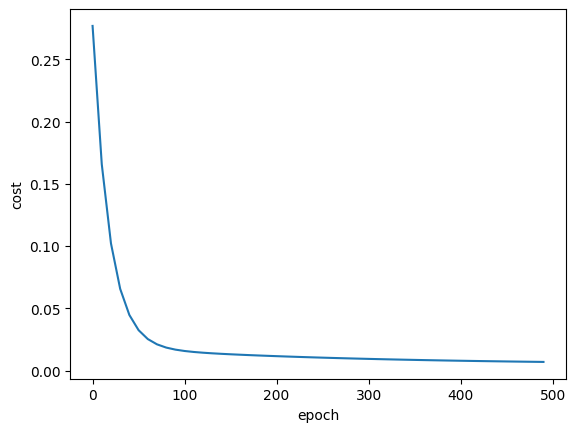

In [7]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [8]:
def predict(area,bedrooms,w,b):
    scaled_X=sx.transform([[area,bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price=w[0]*scaled_X[0]+w[1]*scaled_X[1]+b
    # once we get price prediction we need to to rescale it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]
predict(2600,4,w,b)


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(128.45484403267596)

## Stochastic Gradient Descent

Stochastic GD will use randomly picked single training sample to calculate error and using this error we backpropage to adjust weights

In [10]:
import random
random.randint(0,6)

5

In [12]:
def stochastic_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    number_of_features=X.shape[1]
    w=np.ones(shape=(number_of_features))
    b=0
    total_samples=X.shape[0]
    cost_list=[]
    epoch_list=[]
    for i in range(epochs):
        random_index=random.randint(0,total_samples-1)
        sample_x=X[random_index]
        sample_y=y_true[random_index]
        
        y_predicted= np.dot(w,sample_x.T) + b

        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*np.sum(sample_y-y_predicted)

        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad

        cost=np.square(sample_y-y_predicted) 
        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.70495789, 0.67488247]),
 np.float64(-0.22790230618300655),
 np.float64(0.004903563084255122))

In [13]:
w,b

(array([0.70712464, 0.67456527]), np.float64(-0.23034857438407427))

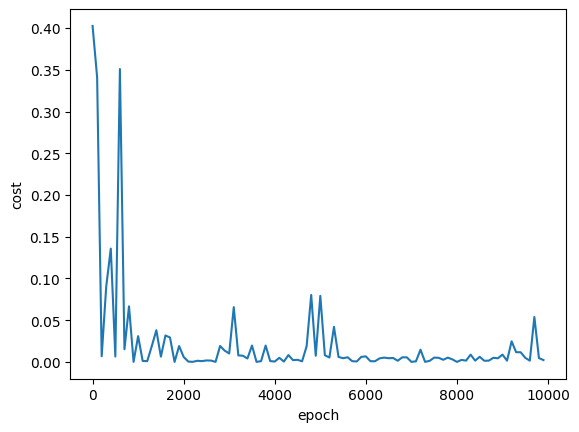

In [14]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)